In [1]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.varmax import VARMAX
from tqdm import tqdm_notebook
from itertools import product

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.gofplots import qqplot
from typing import Union

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Pg 203
macro_econ_data = sm.datasets.macrodata.load_pandas().data
macro_econ_data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


# realcons

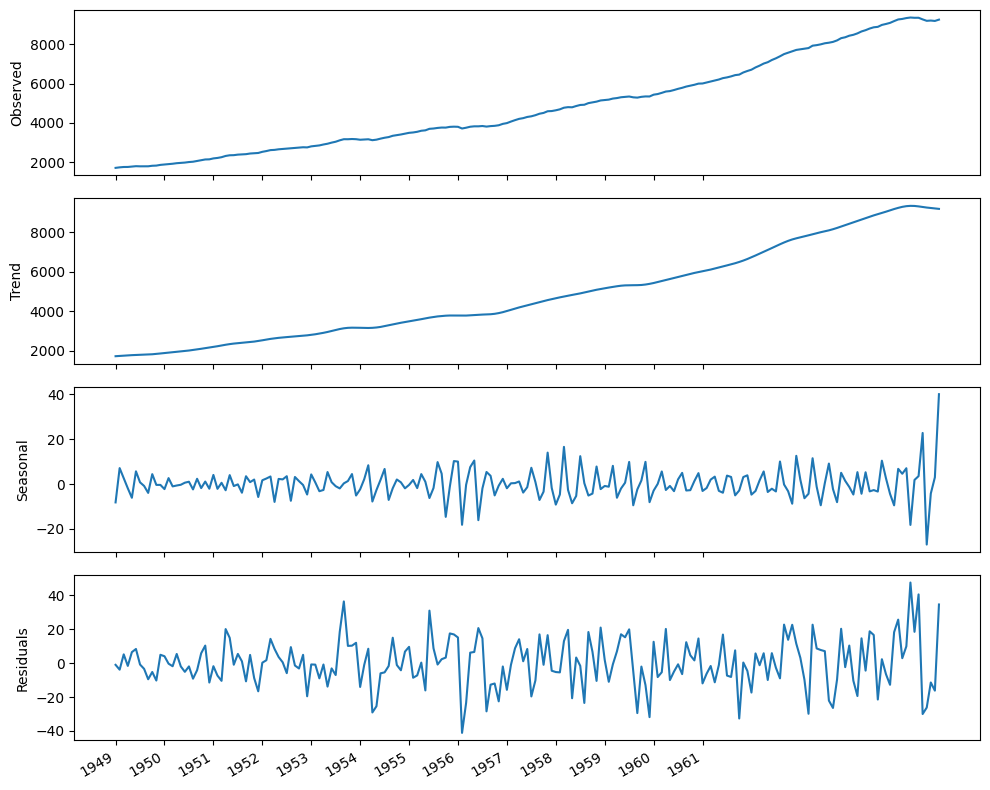

In [3]:
decomposition_realcons = STL(macro_econ_data['realcons'], period=4).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition_realcons.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition_realcons.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition_realcons.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition_realcons.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

In [29]:
macro_econ_data['realcons'].std()

np.float64(2313.346192143467)

In [30]:
ad_fuller_result_1 = adfuller(macro_econ_data['realcons'].diff()[1:])

print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

macro_econ_data['realcons'].diff()[1:].std()

realdpi
ADF Statistic: -4.204306080845247
p-value: 0.0006479282158627571


np.float64(33.74623986446349)

In [32]:
ad_fuller_result_1 = adfuller(macro_econ_data['realcons'].diff(periods=4)[4:])

print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

macro_econ_data['realcons'].diff(periods=4)[4:].std()

realdpi
ADF Statistic: -2.2563240425684175
p-value: 0.1864413027595136


np.float64(103.8587591720532)

In [31]:


ad_fuller_result_1 = adfuller(macro_econ_data['realcons'].diff(periods=4).diff()[5:])

print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

macro_econ_data['realcons'].diff(periods=4).diff()[5:].std()

realdpi
ADF Statistic: -5.83142772007772
p-value: 3.9667698085161903e-07


np.float64(40.65223704499613)

In [7]:
ad_fuller_result_1 = adfuller(decomposition_realcons.seasonal)

print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

realdpi
ADF Statistic: -5.889268111885436
p-value: 2.950777656047699e-07


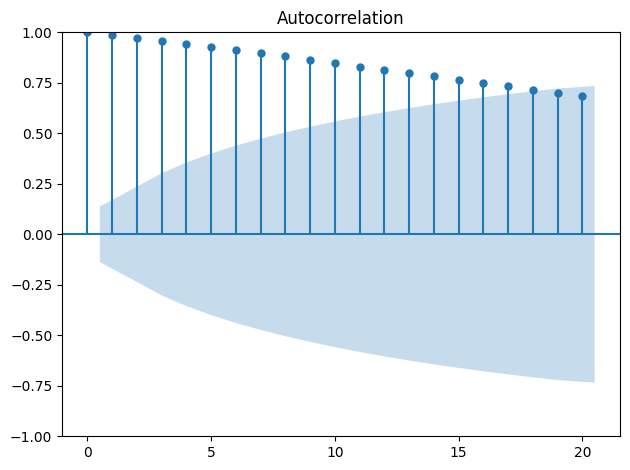

In [21]:
plot_acf(macro_econ_data['realcons'], lags=20)

plt.tight_layout()

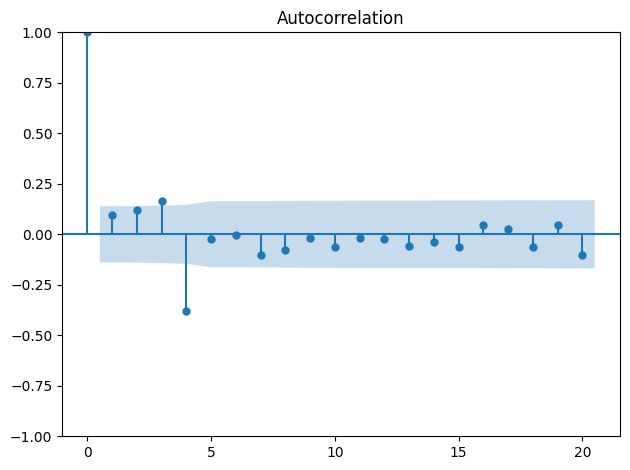

In [8]:
plot_acf(macro_econ_data['realcons'].diff(periods=4).diff()[5:], lags=20)

plt.tight_layout()

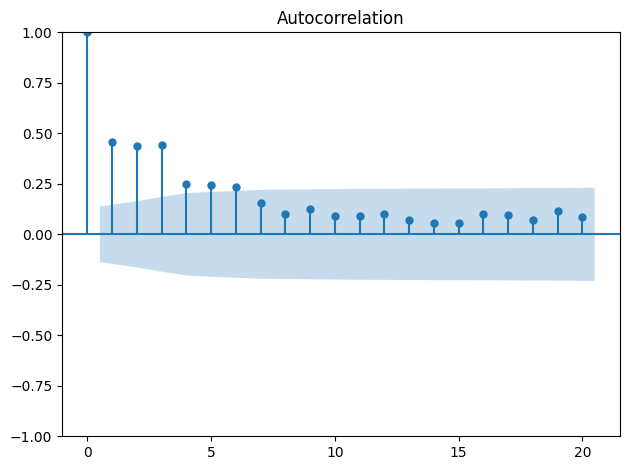

In [25]:
plot_acf(macro_econ_data['realcons'].diff()[1:], lags=20)

plt.tight_layout()

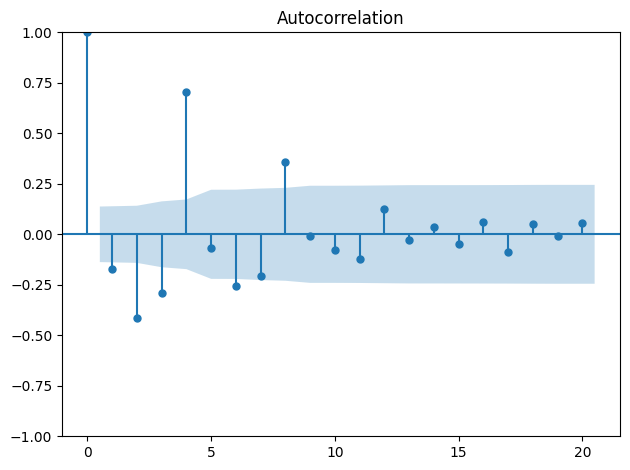

In [9]:
plot_acf(decomposition_realcons.seasonal, lags=20)

plt.tight_layout()

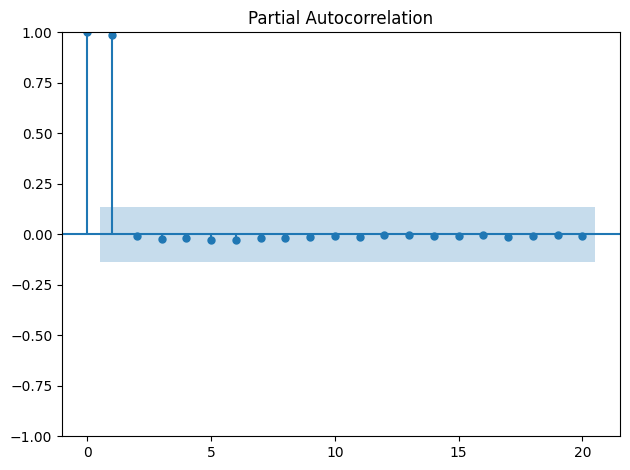

In [22]:
plot_pacf(macro_econ_data['realcons'], lags=20)

plt.tight_layout()

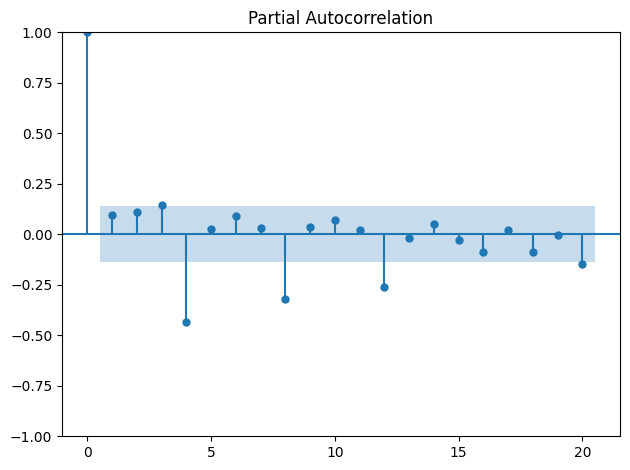

In [10]:
plot_pacf(macro_econ_data['realcons'].diff(periods=4).diff()[5:], lags=20)

plt.tight_layout()

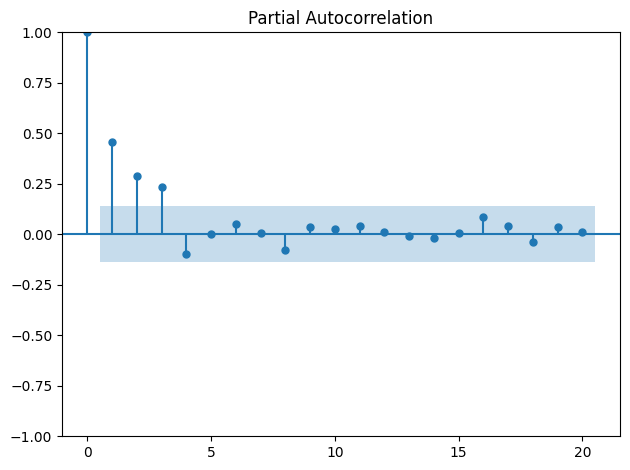

In [26]:
plot_pacf(macro_econ_data['realcons'].diff()[1:], lags=20)

plt.tight_layout()

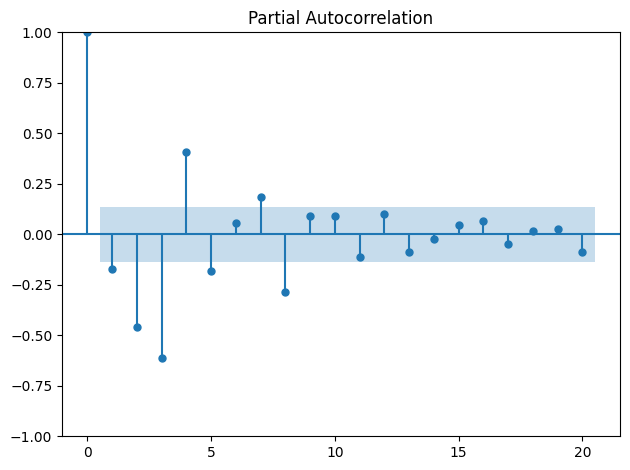

In [11]:
plot_pacf(decomposition_realcons.seasonal, lags=20)

plt.tight_layout()

# realdpi

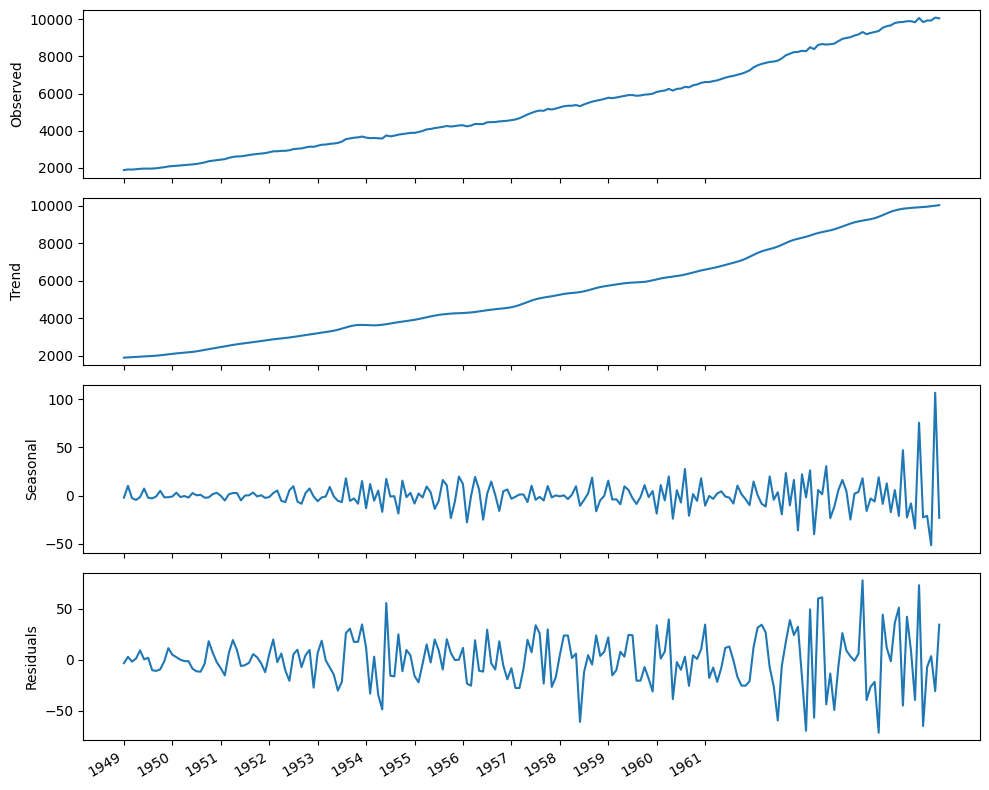

In [12]:
decomposition_realdpi = STL(macro_econ_data['realdpi'], period=4).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition_realdpi.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition_realdpi.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition_realdpi.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition_realdpi.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 145, 12), np.arange(1949, 1962, 1))

fig.autofmt_xdate()
plt.tight_layout()

In [33]:
ad_fuller_result_1 = adfuller(macro_econ_data['realdpi'].diff()[1:])

print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

macro_econ_data['realdpi'].diff()[1:].std()

realdpi
ADF Statistic: -8.864893340673008
p-value: 1.4493606159108096e-14


np.float64(53.55370487369874)

In [34]:
ad_fuller_result_1 = adfuller(macro_econ_data['realdpi'].diff(periods=4)[4:])

print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

macro_econ_data['realdpi'].diff(periods=4)[4:].std()

realdpi
ADF Statistic: -2.335800290450179
p-value: 0.1606814290152056


np.float64(102.65725738486313)

In [35]:


ad_fuller_result_1 = adfuller(macro_econ_data['realdpi'].diff(periods=4).diff()[5:])

print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

macro_econ_data['realdpi'].diff(periods=4).diff()[5:].std()

realdpi
ADF Statistic: -7.228724010956374
p-value: 2.0208143402420522e-10


np.float64(72.59709859598512)

In [16]:
ad_fuller_result_1 = adfuller(decomposition_realdpi.seasonal)

print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

realdpi
ADF Statistic: -5.902139992180092
p-value: 2.762040382524724e-07


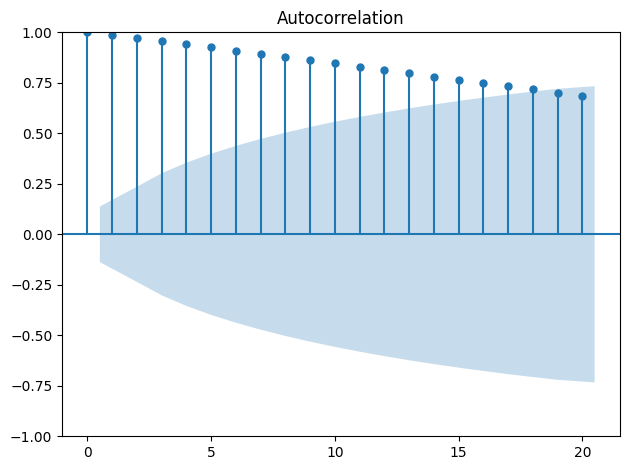

In [23]:
plot_acf(macro_econ_data['realdpi'], lags=20)

plt.tight_layout()

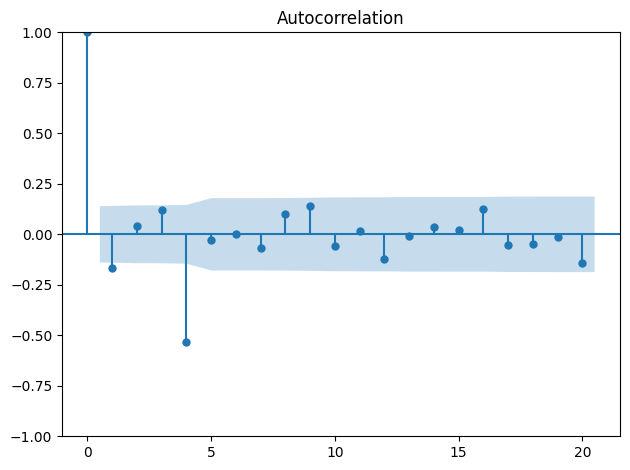

In [17]:
plot_acf(macro_econ_data['realdpi'].diff(periods=4).diff()[5:], lags=20)

plt.tight_layout()

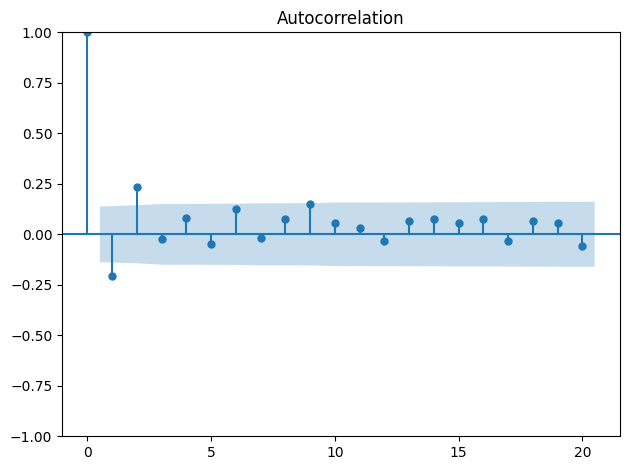

In [27]:
plot_acf(macro_econ_data['realdpi'].diff()[1:], lags=20)

plt.tight_layout()

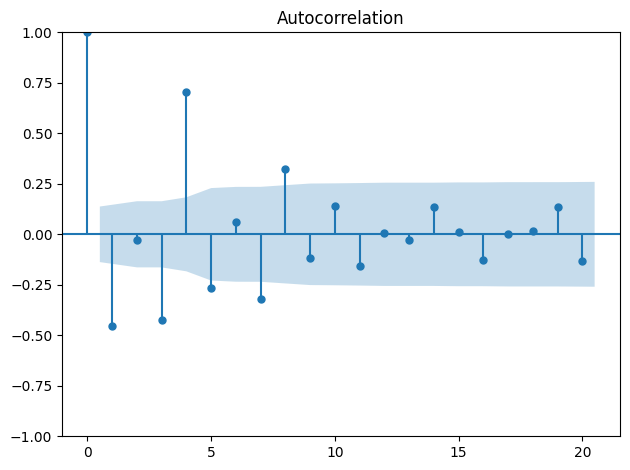

In [18]:
plot_acf(decomposition_realdpi.seasonal, lags=20)

plt.tight_layout()

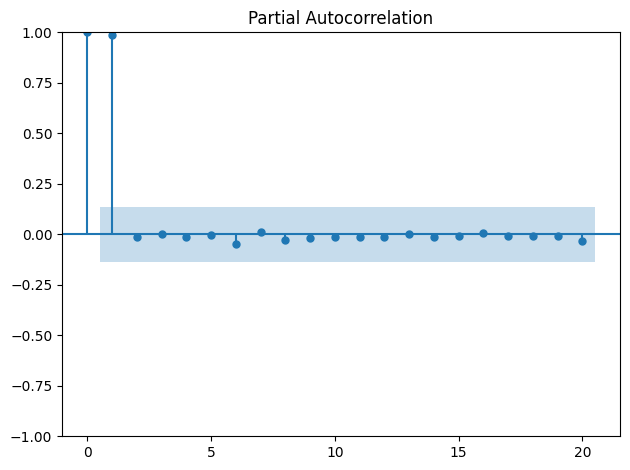

In [24]:
plot_pacf(macro_econ_data['realdpi'], lags=20)

plt.tight_layout()

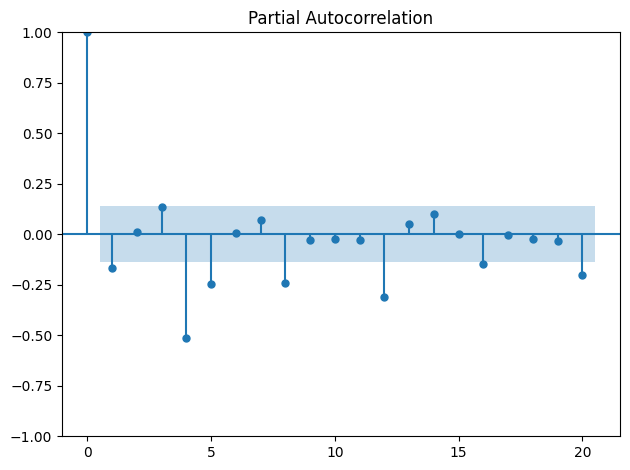

In [19]:
plot_pacf(macro_econ_data['realdpi'].diff(periods=4).diff()[5:], lags=20)

plt.tight_layout()

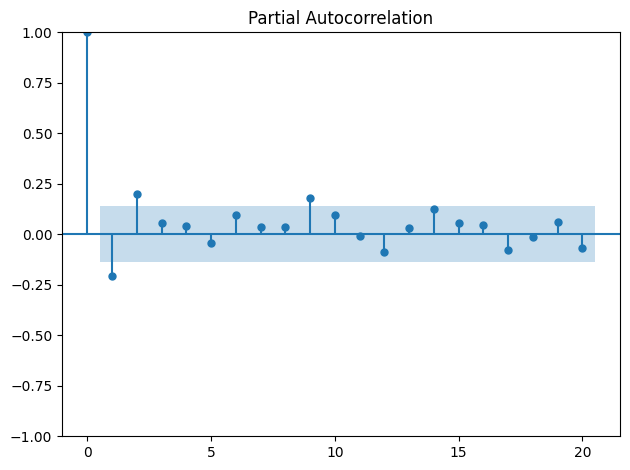

In [28]:
plot_pacf(macro_econ_data['realdpi'].diff()[1:], lags=20)

plt.tight_layout()

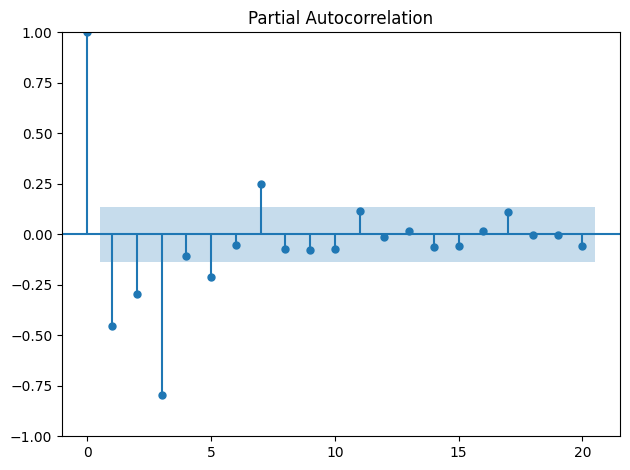

In [20]:
plot_pacf(decomposition_realdpi.seasonal, lags=20)

plt.tight_layout()